# RSA Demonstration

Import my RSA package into the environment

In [1]:
from RSA import *

### Key Generation
Declare the bit size we want to use

In [2]:
bitSize = 40

Generate a set of RSA keys with appropriate bitsize

In [5]:
RSA_keys = generate_RSA.KeyGen(bitSize, True, True)     # initalise object True sets verbose and demo flag on KeyGen
RSA_keys.generateKeys()                                 # runs generator

Generating  20 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  128
New candidate... 937465
New candidate... 913385
New candidate... 628693
New candidate... 852439
New candidate... 1012981
Prime of  20 bits found: 1012981
Checked 5 candidates in 0.00 s
Generating  20 bit prime... 
10 rounds of Miller-Rabin needed (according to FISC)
Trial-Division prime list generated, size:  128
New candidate... 769227
New candidate... 767917
New candidate... 569353
New candidate... 714099
New candidate... 785969
New candidate... 1012015
New candidate... 700615
New candidate... 919405
New candidate... 838729
New candidate... 818267
New candidate... 710323
Prime of  20 bits found: 710323
Checked 11 candidates in 0.00 s

p: 1012981
q: 710323

n: 719543702863
e: 469329960961
n bit length: 40
Private-Key, d: 312792417721
Public-Key: (719543702863, 469329960961)
Private-Key: 312792417721
n is 40 bits



True

### Brute Force Algorithm

The simplest approach. 

- Take the $\sqrt{n}$ and check if it divides n. 
- If it does not enumerate each odd smaller than $\sqrt{n}$ until a factor is found. 
- $O(\sqrt{n})$ (ignoring logarithmic test for division)

In [6]:
bf = brute_force.BFSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
bf.solve()                                                      # run solver

'719543702863 % 710323 = 0'

p: 710323
q: 1012981
Private-Key, d: 312792417721
Numbers checked: 68969
Space used: 2 bytes
Time taken: 2.763 s


True

### Make it a bit harder

In [8]:
bitSize = 46

RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  23 bits found: 5720401
Checked 1 candidates in 0.00 s
Prime of  23 bits found: 7168211
Checked 5 candidates in 0.00 s

p: 5720401
q: 7168211

n: 41005041372611
e: 13635334791251
n bit length: 46
Private-Key, d: 15245459568251
Public-Key: (41005041372611, 13635334791251)
Private-Key: 15245459568251
n is 46 bits



True

### Fermat's Factorisation Method

Relies on Fermat’s observation that any odd number can be represented as the
difference of two squares. 

- We again start with $γ ← \sqrt{n}$
- now we increment γ a single numberat a time until $γ^2 \; mod \; n \; = \; b^2$ where b is an integer. 
- then $\{p,q\} = γ \pm b$
- The worst-case time-complexity is exactlythe same as for brute-force, $O(\sqrt{n})$

In [9]:
ff = fermats.FFSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
ff.solve()                                                  # run solver

'sqrt(41529079821636 - 41005041372611) = 723905.0'

p: 5720401
q: 7168211
Private-Key, d: 15245459568251
Numbers checked: 40790
Space used: 6 bytes
Time taken: 1.531 s


True

### KNJ - Factorisation

The same as brute-force, but includes a check for prime numbers first. 

- Take the $\sqrt{n}$ and check if it divides n. 
- If it does not enumerate each prime number smaller than $\sqrt{n}$ until a factor is found. 
- $O(\frac{\sqrt{n}}{log(\sqrt{n})})$ (estimation of the number of primes up to $\sqrt{n}$)

In [10]:
knj = knj_factorisation.KNJSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
knj.solve()                                                             # run solver

'41005041372611 % 5720401 = 0'

p: 5720401
q: 7168211
Private-Key, d: 15245459568251
Numbers checked: 43700
Space used: 877260 bytes
Time taken: 1.681 s


True

### Pollard's p-1 

Is our first probabilistic algorithm:

- Utilises Fermat's little theorem 
- for a semi-prime $n \leftarrow pq$, if $x \leftarrow a^{K(p-1)} \equiv 1 \; mod \; p$ then the $gcd(x - 1, n)$ will be divisible by $p$
- We use a B-powersmooth number to find this large multiple
- If our B is too high and both p and q are B-powersmooth it fails
- So is probabilistic and we have to backtrack our B (or increase it)
- $O(B \log{B} \log_2n)$

In [12]:
polMin = pollard_p_minus_1.PSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
polMin.solve()                                                           # run solver

'Testing B = 229'

p: 5720401
q: 7168211
Private-Key, d: 15245459568251
Numbers checked: 42
Space used: 28 bytes
Time taken: 0.007 s


True

### Pollard's-$\rho$ method


Another probabilistic method:

- A random but known sequence is generated $\{x_k \; mod \; n\}$
- This has a relation with the sequence mod a factor of $n$, $\{x_k \; mod \; p\}$
- Send runners y and z around the sequence, one twice as fast as the other 
- $gcd(x_y - x_z, n)$ will return a non trivial answer if the smaller, $p$ cycle repeats itself
- This is called Floyd's cycle detection
- $O(n^{1/4})$ via the birthday-paradox

In [13]:
rho = pollard_rho.RhoSolver(RSA_keys.n, RSA_keys.e, True, True)   # pass it public keys, and True verbose & demo flag
rho.solve()                                                       # run solver

'gcd(40465029823227 - 15700165432629, 41005041372611) = 7168211'

p: 7168211
q: 5720401
Private-Key, d: 15245459568251
Numbers checked: 2147
Space used: 10 bytes
Time taken: 0.309 s


True

### Quadratic Sieve

In essence, this is advanced Fermat's Factoring:

- We no longer care about testing for one $\beta \leftarrow a^2 \; mod \; n$ until $\beta$ is a square number
- We instead build a congruence of squares, s.t. the product is a square ($b^2 \leftarrow \beta _1 * ... * \beta _k \; s.t. \; b \in N $)
- Again a smoothness bound, B, is used to ensure each $\beta$ can be fully factored over a small number of primes 
- A matrix is then built of prime-exponent vectors for each $\beta$
- Matrix elimination is then applied to find the zero vector, which means the number produced is square
- This sum of vectors used to produce the zero vectors can then be used to determine the factors
- A hard time-complexity to define, but should be sub-exponential

In [14]:
# need to recalculate as only 100% guarenteed for these very small sizes 

bitSize = 20

RSA_keys = generate_RSA.KeyGen(bitSize, True)     # initalise object True sets verbose flag on KeyGen
RSA_keys.generateKeys()                           # runs generator

Prime of  10 bits found: 727
Checked 4 candidates in 0.00 s
Prime of  10 bits found: 1013
Checked 2 candidates in 0.00 s

p: 727
q: 1013

n: 736451
e: 470269
n bit length: 20
Private-Key, d: 230941
Public-Key: (736451, 470269)
Private-Key: 230941
n is 20 bits



True

In [15]:
quad = quadratic_sieve.QSolver(RSA_keys.n, RSA_keys.e, True, True)  # pass it public keys, and True verbose & demo flag
quad.solve()                                                        # run solver

Length of possible primes: 528
Length of primes with quadRes(n,p) == 1: 265 

p: 727
q: 1013
Private-Key, d: 230941
Numbers checked: 89
Space used: 140980 bytes
Time taken: 0.203 s


True

### Basic Analysis
Running the above algorithms on a variety of random inputs to create graphs showing general trends.

The below style code makes the format of the graphs nicer

In [16]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

Runs each algorithm in a thread and plots the results.

<IPython.core.display.Javascript object>


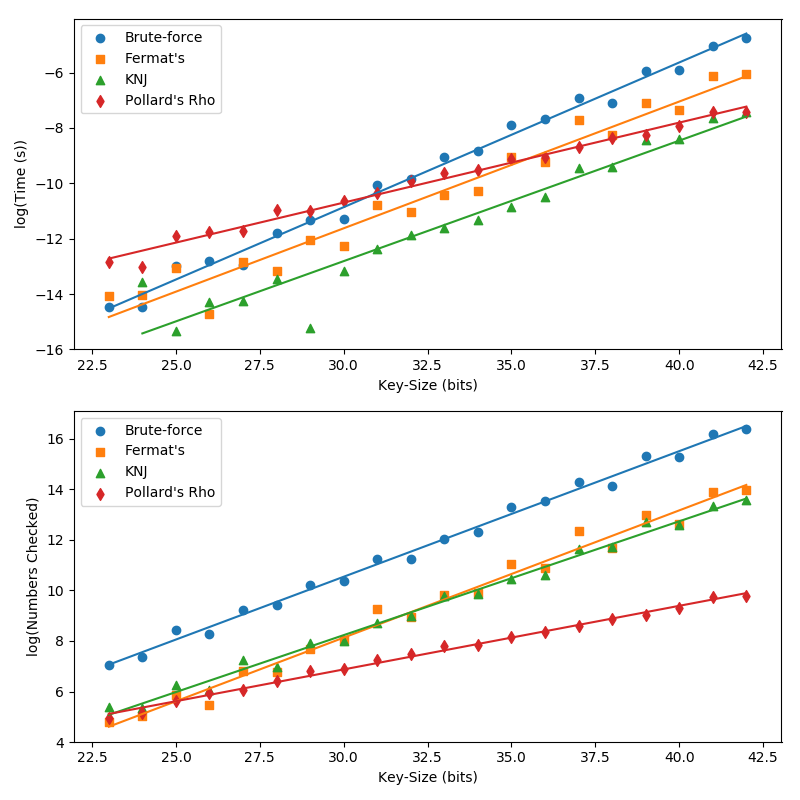

Press Enter to stop.


In [17]:
%matplotlib notebook
from graphs_RSA import *

COUNT = 250

minBit = 24
bf_bit = 44
ff_bit = 44
knj_bit = 44
rho_bit = 44

testGraphs(minBit, bf_bit, ff_bit, knj_bit, rho_bit, COUNT)

<img src="imgs/RSA.png" alt="drawing" style="width:80%;"/>

## Try it yourself

Below you can select which solvers you want to use and enter your own two prime numbers to test against the solvers

In [3]:
# SET YOUR CHOSEN PRIME NUMBERS
p = 11
q = 20

# GENERATE KEYS BASED ON NUMBERS CHOSEN 
RSA_keys = generate_RSA.KeyGen(verbose = True, demo = True)  
prime = RSA_keys.setPrimes(p, q)

# returns error code if p and q are not prime
if prime:
    RSA_keys.generateKeys()

20 is not prime


In [4]:
import run_RSA

# SET SOLVERS ON/OFF 
bf = True    # brute-force
ff = True    # fermat's factoring
pr = True    # pollard's - rho
knj = True   # knj factorisation
pm1 = True   # pollard's p-1
qs = True    # quadratic sieve

# PASS KEYS TO SOLVER
run_RSA.runSolvers(RSA_keys, bf, ff, pr, knj, pm1, qs)

========== BRUTE FORCE ==========
Can't solve for n = 0
Fail!
========== FERMAT'S METHOD ==========
Can't solve for even n
Fail!
========== POLLARD'S RHO ==========
Can't solve for n = 0
Fail!
========== KNJ FACTORISATION ==========
Can't solve for n = 0
Fail!
========== POLLARD'S P-1 ==========
Can't solve for n = 0
Fail!
========== QUADRATIC SIEVE ==========
Can't solve for n = 0
Fail!


In [5]:
# just proving nothing dodgy is going on by sending all of RSA_keys to the run file

public_n = RSA_keys.n
public_e = RSA_keys.e

rho = pollard_rho.RhoSolver(public_n, public_e, True)                    
rho.solve()

Can't solve for n = 0


False